# Product Analysis for Online Retailing

**Abstract:** This project is based on a transnational dataset which contains all the transactions occurring between 1/12/2010 and 9/12/2011 for a UK-based and registered non-store online retail. Through data analysis and modeling,  this project will focus on customer segmentation as well as predictive sales that will help the retailer make strategic decisions to increase its sales and profits.  

## 1. Problem Statement & Business Case

The company mainly sells unique all-occasion gifts and many of the customers of the company are wholesalers. The customers are located in various countries. By looking at the historical data, we would like to identify consumer patterns of this retailer and make predictions of future sales.

One of the problems to be solved through this project is **customer segment**. We would like to know more about customer profiles and similarities among the customers that help with better targeting current and potential customers in the future. Questions to be answered include: 1. Who are the major customers and where are they? 2. Any similarities among the customers with regard to geographical locations, favorable products, purchasing patterns and so on? Customer segment is an **unsupervised classification** problem in nature. In this exercise the hypothesis is that there are similarities among all the customers. By looking at their countries, products purchased as well as quantities and unit prices, purchasing dates, we would classify the customers into several groups.

Another problem we would like to solve is **predictive sales** of this retailer. By diving into historical sales data, we would expect to answer the following questions: 1. What are the most popular and least popular products? 3. When do most sales take place? 4. Any trends in terms of sales in the one year and nine month period? 5. Does product pricing affect sales and by how much? 5. What do predictive sales look like? We will focus on individual products. The underlying assumption is that past sales would help to predict future sales. Using **regression** models, we will find out contributing factors and degrees of various as related to product sales. 

## 2. Data Wrangling

### 2.1 Data Collection

In [1]:
#Load python packages
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_excel('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Description of columns

| Column | Description |
| :- | :- |
| InvoiceNo | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cacellation. |
| StockCode | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. |
| Description | Product (item) name. Nominal. |
| Quantity | The quantities of each product (item) per transaction. Numeric. |
| InvoiceDate | Invoice Date and time. Numeric, the day and time when each transaction was generated. |
| UnitPrice | Unit price. Numeric. Product price per unit in sterling. |
| CustomerID | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. |
| Country | Country name. Nominal, the name of the country where each customer resides. |


### 2.2 Data Cleaning

In [ ]:
df.info()

In [ ]:
# Print the range of values using the aggregate function. 
df.describe().T

#### 2.2.1 Missing values

In [3]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


Two variables have missing values. Let's look at them individually and think about filling methods. 

**Description**: each product has a unique StockCode and description. Therefore it is possible to fill missing discription using StockCode. Bear in mind that in later analysis, only one of StockCode and Description will be used in analysis and modelling, because they are highly correlated. 

In [4]:
df['Description'] = df.groupby(["StockCode"])['Description'].transform(lambda x: x.fillna(x.mode()))

nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


**CustomerID**: each transaction record involves an InvoiceNo, CustomerID and Country. Therefore we might be able to fill in missing CustomerID using InvoiceID and Country. 

In [5]:
df_Non_Null = df[df['CustomerID'].isnull()==False].copy()
print(df_Non_Null.shape)

df_Null = df[df['CustomerID'].isnull()==True].copy()
print(df_Null.shape)

df_join = df_Non_Null.merge(df_Null, on = 'InvoiceNo', how = 'inner')
df_join.head()

(406829, 8)
(135080, 8)


,InvoiceNo,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,CustomerID_y,Country_y


In [6]:
# since we were not able to find appropriate ways to fill the missing data, we will drop the missing values.
df = df.dropna(subset=['Description', 'CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
# set the data types: all columncs look good except that "CustomerID" should be string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.2.2 Duplicates

In [ ]:
# Is there any duplicates?
duplicated = df[df.duplicated()]
duplicated.head(5)

# Does it related to data type? Except InvoiceNo and Quantity, all other columns are string type.
# The results show that those are not really duplicate. They are different products shown on the
# results, meaning that one customer purchased various of products at one time. They should be 
# kept in the data for analysis. 
# subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], keep=False

In [ ]:
# df.drop_duplicates(inplace=True)
# df.info()

# This code will delete rows and leave me only 4837 rows. Sth went wrong. 

#### 2.2.3 Anomalies and Outliers

In [ ]:
df.describe()

The distribution of Quantity and UnitPrice is highly skewed. While most purchases are about small Quantity and small UnitPrice, there are a few extra large amount Quantity and UnitPrice.

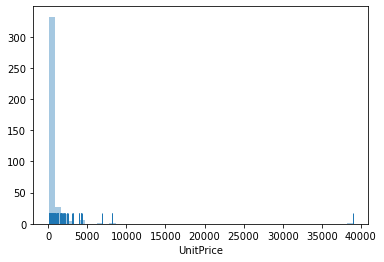

In [8]:
# price distribution of goods with UnitPrice larger than 50:
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=False, rug=True)

In [9]:
# Check out description of products, which cost more than 50. 
df[df['UnitPrice']>50]['Description'].unique().tolist()

['RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
 'VINTAGE POST OFFICE CABINET',
 'VINTAGE RED KITCHEN CABINET',
 'Discount',
 'REGENCY MIRROR WITH SHUTTERS',
 'LOVE SEAT ANTIQUE WHITE METAL',
 'VINTAGE BLUE KITCHEN CABINET',
 'SCHOOL DESK AND CHAIR ',
 'CHEST NATURAL WOOD 20 DRAWERS',
 'CARRIAGE',
 'Manual',
 'DECORATIVE HANGING SHELVING UNIT',
 'POSTAGE',
 'PICNIC BASKET WICKER 60 PIECES',
 'BROCADE RING PURSE ',
 'DOTCOM POSTAGE',
 'CRUK Commission']

 "Manual", "POSTAGE" and "DOTCOM POSTAGE" do not look like normal goods. Double check on this:

In [10]:
df[df['Description']=='Manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom


In [11]:
df[df['Description']=='POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [12]:
df[df['Description']=='DOTCOM POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096,United Kingdom
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096,United Kingdom
333755,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096,United Kingdom
338829,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096,United Kingdom
350599,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096,United Kingdom
361584,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096,United Kingdom
372766,569246,DOT,DOTCOM POSTAGE,1,2011-10-03 09:57:00,490.25,14096,United Kingdom
389983,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096,United Kingdom
401766,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096,United Kingdom
416463,572552,DOT,DOTCOM POSTAGE,1,2011-10-24 17:07:00,638.30,14096,United Kingdom


Thus, "Manual" goods are items with missing or misplaced StockCode. They do not providd useful information for product analysis. The 284 items with "Manual" description will be deleted.  <br>
Postage and DOTCOM POSTAGE will be deleted as well.

In [13]:
df = df[~df['Description'].isin(['Manual', 'POSTAGE', 'DOTCOM POSTAGE'])]
df.describe()

,Quantity,UnitPrice
count,405152.000000,405152.000000
mean,12.095920,2.949735
std,249.166005,6.695936
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,1867.860000


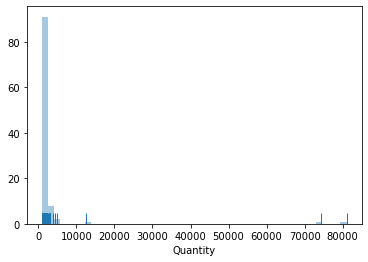

In [14]:
# Now let's check on distribution of goods with Quantity larger than 1000:
sns.distplot(df[df['Quantity']>1000]['Quantity'], kde=False, rug=True)

In [15]:
# Check on goods with large Quantity, 
df[df['Quantity']>5000]['Description'].unique().tolist()

['MEDIUM CERAMIC TOP STORAGE JAR',
 'ASSTD DESIGN 3D PAPER STICKERS',
 'PAPER CRAFT , LITTLE BIRDIE']

In [16]:
# Now UnitPrice and Quantity are alright. Let's check on the dataframe one more time.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405152 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    405152 non-null  object        
 1   StockCode    405152 non-null  object        
 2   Description  405152 non-null  object        
 3   Quantity     405152 non-null  int64         
 4   InvoiceDate  405152 non-null  datetime64[ns]
 5   UnitPrice    405152 non-null  float64       
 6   CustomerID   405152 non-null  object        
 7   Country      405152 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.8+ MB


## 3. Exploratory Data Analysis

In [17]:
# for the purpose of time series analysis, let's split the InvoiceDate into details.
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Month_year'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df['Hour'] = df['InvoiceDate'].dt.hour

In [18]:
# adding a column of "revenue"
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [19]:
# now check on how the data look like.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


Notice when InvoiceNo starts with letter 'c', it indicates a cacellation. We would like to split the data into: <br> >> **df_cancelled - cancelled orders** <br> >>  **df - regular orders**. 

In [20]:
# Let's split the cancelled orders out from the normal orders.
df_cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
df_cancelled.head()
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8633 entries, 141 to 541717
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8633 non-null   object        
 1   StockCode    8633 non-null   object        
 2   Description  8633 non-null   object        
 3   Quantity     8633 non-null   int64         
 4   InvoiceDate  8633 non-null   datetime64[ns]
 5   UnitPrice    8633 non-null   float64       
 6   CustomerID   8633 non-null   object        
 7   Country      8633 non-null   object        
 8   Month        8633 non-null   int64         
 9   Year         8633 non-null   int64         
 10  Weekday      8633 non-null   object        
 11  Month_year   8633 non-null   datetime64[ns]
 12  Hour         8633 non-null   int64         
 13  Revenue      8633 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 1011.7+ KB


In [21]:
# double check if there is any anamolies
df_cancelled[df_cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue


In [22]:
print("Number of cancelled transactions:", len(df_cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity']<=0]['Quantity'].count())
print(df[df['Quantity']<0].count())
print(df[df['Quantity']==0].count())

Number of cancelled transactions: 8633
Total number of transaction with negative quantity: 8633
InvoiceNo      8633
StockCode      8633
Description    8633
Quantity       8633
InvoiceDate    8633
UnitPrice      8633
CustomerID     8633
Country        8633
Month          8633
Year           8633
Weekday        8633
Month_year     8633
Hour           8633
Revenue        8633
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64


In [23]:
# df = df[df['InvoiceNo'].astype(str).str.contains('C')]
print(df[df['UnitPrice']<0].count())
print(df[df['UnitPrice']==0].count())
print(df_cancelled[df_cancelled['UnitPrice']<=0].count())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64
InvoiceNo      34
StockCode      34
Description    34
Quantity       34
InvoiceDate    34
UnitPrice      34
CustomerID     34
Country        34
Month          34
Year           34
Weekday        34
Month_year     34
Hour           34
Revenue        34
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Weekday        0
Month_year     0
Hour           0
Revenue        0
dtype: int64


In [24]:
# clean up df so it does not contain any cancellations and zero UnitPrice. 
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396519 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396519 non-null  object        
 1   StockCode    396519 non-null  object        
 2   Description  396519 non-null  object        
 3   Quantity     396519 non-null  int64         
 4   InvoiceDate  396519 non-null  datetime64[ns]
 5   UnitPrice    396519 non-null  float64       
 6   CustomerID   396519 non-null  object        
 7   Country      396519 non-null  object        
 8   Month        396519 non-null  int64         
 9   Year         396519 non-null  int64         
 10  Weekday      396519 non-null  object        
 11  Month_year   396519 non-null  datetime64[ns]
 12  Hour         396519 non-null  int64         
 13  Revenue      396519 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 45.4+ MB


In [25]:
df = df[df['UnitPrice']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396485 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396485 non-null  object        
 1   StockCode    396485 non-null  object        
 2   Description  396485 non-null  object        
 3   Quantity     396485 non-null  int64         
 4   InvoiceDate  396485 non-null  datetime64[ns]
 5   UnitPrice    396485 non-null  float64       
 6   CustomerID   396485 non-null  object        
 7   Country      396485 non-null  object        
 8   Month        396485 non-null  int64         
 9   Year         396485 non-null  int64         
 10  Weekday      396485 non-null  object        
 11  Month_year   396485 non-null  datetime64[ns]
 12  Hour         396485 non-null  int64         
 13  Revenue      396485 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(6)
memory usage: 45.4+ MB


### 3.1 Normal Orders

In [ ]:
# A quick check of variable distributions.

df.hist(figsize=(15, 15))

The following information could be extracted from above histogram distributions:
    Quantity and UnitPrice are highly skewed, while the distribution is so large. As a consequence, revenue (product of Quantity and UnitPrice) exhibits the same pattern. Further investigation is needed on those large data.<br>
   > **Purchases are mostly happened in early afternoons, from 1PM to 215PM, followed by time period from 1145AM to 1PM and then from 9AM to 10AM.** <br>
   > **Most purchasess happeed in holiday seasons, December, November, January and October are when the transaction volumes are high.**

### 3.1.1 Analysis by country

In [ ]:
# What are the buying countries?
df['Country'].unique()

In [ ]:
# Count how many countries in total

print(len(df['Country'].unique()))

#### 3.1.1.1 By # of transactions

In [ ]:
# Each InvoiceNo is corresponding to one transacton.
df_country_transaction = df['InvoiceNo'].groupby(df['Country']).count().sort_values(ascending = False)
print(df_country_transaction)

In [ ]:
# Top 10 countries with highest transactions  
df_country_transaction.head(10).plot.bar(figsize = (15, 7))

plt.title('Top Ten Countries, by transactions', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Transactions (*100 billion)')
plt.show()

Obviously, UK is the country with largest transactions. We would like to take a closer look at other countries. 

In [ ]:
df_country_transaction_woUK = df_country_transaction.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_transaction_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.2 By Quantity

In [ ]:
df_country_quantity = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
print(df_country_quantity)

In [ ]:
# Top 10 countries with highest Quantity 

df_country_quantity.head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Quantity (*100,000)')
plt.show()

Let's take a closer look at countries other than UK. 

In [ ]:
df_country_quantity_woUK = df_country_quantity.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_quantity_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.3 By Revenue

In [ ]:
df_country_revenue = df['Revenue'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
df_country_revenue

In [ ]:
# Top 10 countries, by Revenue 

df_country_revenue.head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Revenue (*million)')
plt.show()

In [ ]:
df_country_revenue_woUK = df_country_revenue.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_revenue_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.4 Summary - analysis by country

No matter by what standard, **United Kingdom is the largest and predominating market for this retailer**. <br>
In terms of number of transactions, Germany, France, EIRE, Spain, Netherlands, Belgium, and Switzerland are leading countries. <br>
In terms of Quantity and Revenue, Netherlands, EIRE, Germany, France, Austrialia are leading. 


### 3.1.2 Analysis by time

#### 3.1.2.1 Time-based transaction analysis 

In [ ]:
# Data frames for plots --- Each InvoiceNo corresponds to one transaction
plot1 = pd.DataFrame(df.groupby(['Month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['Weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count()).reset_index()

plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
df['Month_year'].value_counts()

In [ ]:
# Transactions in each month
ax = sns.barplot(x="Month_year", y="InvoiceNo", data = plot1)

In [ ]:
# Transactions in each weekday
ax = sns.barplot(x="Weekday", y="InvoiceNo", data = plot2)

In [ ]:
# Transactions in each hour
ax = sns.barplot(x="Hour", y="InvoiceNo", data = plot3)

#### 3.1.2.2 Time-based revenue analysis 

In [ ]:
# Data frames for plots
plot4 = pd.DataFrame(df.groupby(['Month_year'])['Revenue'].sum()).reset_index()
plot5 = pd.DataFrame(df.groupby(['Weekday'])['Revenue'].sum())
plot6 = pd.DataFrame(df.groupby(['Hour'])['Revenue'].sum()).reset_index()

plot5 = plot5.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
# Revenue in each month
ax = sns.barplot(x = 'Month_year', y='Revenue', data = plot4)

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Total Revenue ($)',fontsize=15)
ax1.set_title('Total Revenue for different Months',fontsize=15)
ax1.bar(df.groupby(by=['Month_year'])['Revenue'].sum().index.tolist()[1:],
        df.groupby(by=['Month_year'])['Revenue'].sum()[1:],
        alpha=0.85,
        label='Revenue by Month')
#----------------
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Change of Total Revenue (%)',fontsize=15)
ax2.plot(df.groupby(by=['Month_year'])['Revenue'].sum().index.tolist()[1:], 
         df.groupby(by=['Month_year'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total revenue (%)',
         color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [ ]:
# Revenue in each weekday
ax = sns.barplot(x = 'Weekday', y='Revenue', data = plot5)

# Annotate bar chart with percentage

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
# for i in ax.patches:
 #   totals.append(i.get_height())

# set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
# for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
  #  ax.text(i.get_x()+0.1, i.get_height()+40, \
   #         str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
    #            fontweight='bold', color='red')
# plt.show()

In [ ]:
# Revenue in each hour
ax = sns.barplot(x = 'Hour', y='Revenue', data = plot6)

#### 3.1.2.3 Summary - analysis by time 

There are more purchases and revenues made by the end of year. **November, October, and September are the top three months when there are most transactions and revenues.**<br>

In terms of weekdays, **Thursday is the day when there are more transactions and revenues than other days.** There is no transaction on Saturday. Wednesday, Tuesday, Monday, Sunday and Friday are the days with descending transactions. But Tuesday, Wednesday, Friday, Monday and Sunday are the days with descending revenues. 

In terms of hours, **noon is the time when there are more transactions and revenues than any other hours.** 13PM, 14PM 11AM, 15PM, 10AM are the time when there are higher transactions. Wither regarding to revenues, 10AM, 13PM, 11AM, 14PM, 15PM and 9AM are the times when there are more revenues. 

### 3.1.3 Analysis by product

In [ ]:
# conda install -c conda-forge wordcloud
# installed already, run the following code to update: 
# $ conda update -n base -c defaults conda

In [ ]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

In [ ]:
df['Description'] = df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [ ]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
# most popular products
df['InvoiceNo'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

In [ ]:
# Products that bring in most revenues
df['Revenue'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

### 3.1.4 Analysis by Customer

#### 3.1.4.1 Analysis by Transaction

In [ ]:
df_customer_transaction = df['InvoiceNo'].groupby(df['CustomerID']).count().sort_values(ascending = False)
df_customer_transaction

In [ ]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_transaction.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Number of Transactions for different Customers', fontsize=12)
plt.show()

#### 3.1.4.2 Customer Analysis by Quantity

In [ ]:
df_customer_quantity = df['Quantity'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_quantity

In [ ]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_quantity.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Quantity for different Customers', fontsize=12)
plt.show()

#### 3.1.4.3 Customer Analysis by Revenue

In [ ]:
df_customer_revenue = df['Revenue'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_revenue

In [ ]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_revenue.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Revenue for different Customers', fontsize=12)
plt.show()

#### 3.1.4.4 Customer Analysis by Time

### 3.1.5 RFM analysis for UK customers

In [ ]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()

In [ ]:
print(df_uk['InvoiceDate'].min())
print(df_uk['InvoiceDate'].max())

In [ ]:
import datetime as dt
presence = dt.datetime(2011, 12, 10)

Calculate recency, frequency and monetary values:

Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

Source: https://www.putler.com/rfm-analysis/

In [ ]:
rfm = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Revenue': 'monetary_value'}, inplace=True)
rfm.head()

In [ ]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
rfm_segments= rfm

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [ ]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)
rfm_segments.head()

In [ ]:
rfm_segments['RFMClass'].unique()

In [ ]:

print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

### 3.2 Cancelled Orders

In [ ]:
# A quick check of variable distributions.

df_cancelled.hist(figsize=(15, 15))

The following information could be extracted from above histogram distributions:
    Quantity and UnitPrice are highly skewed, while the distribution is so large. As a consequence, revenue (product of Quantity and UnitPrice) exhibits the same pattern. Further investigation is needed on those large data.<br>
   > **Cancellations are more evenly distributed than purchases. There timer period with highest cancellations happend around 1-2:15PM, 3:45-5PM and 8:45-10:15AM.** <br>
   > **Most purchasess happeed in holiday seasons and after holiday seasons, November-December, and January-February are when the cancellation volumes are high.**

### 3.2.1 Analysis by country

In [ ]:
# What are the buying countries?
df_cancelled['Country'].unique()

In [ ]:
# Count how many countries in total

print(len(df_cancelled['Country'].unique()))

In [ ]:
df_cancelled['InvoiceNo'] = df_cancelled['InvoiceNo'].str.replace('C', '')

In [ ]:
df_cancelled.head()

#### 3.2.1.1 By # of cancellations

In [ ]:
# Each InvoiceNo is corresponding to one transacton.
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False)

In [ ]:
# Top 10 countries with highest transactions  
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title('Top Ten Countries, by cancellations', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Cancellations')
plt.show()

In [ ]:
# Bottom 10 countries with lowest transactions  
df_cancelled['InvoiceNo'].groupby(df_cancelled['Country']).count().sort_values(ascending = False).tail(10).plot.bar(figsize = (15, 7))

plt.title('Bottom Ten Countries, by cancellations', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Cancellations')
plt.show()

#### 3.1.1.2 By Quantity

In [ ]:
df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False)

In [ ]:
# Top 10 countries with highest Quantity 

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Cancelled Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Quantity')
plt.show()

In [ ]:
# Bottom 10 countries, byQuantity 

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).tail(10).plot.bar(figsize = (18, 7))
plt.title('Bottom Ten Countries, by Cancelled Quantity', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Quantity')
plt.show()

#### 3.1.1.3 By Revenue

In [ ]:
df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False)

In [ ]:
# Top 10 countries, by Revenue 

df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (18, 7))
plt.title('Top Ten Countries, by Cancelled Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Revenue')
plt.show()

In [ ]:
# Bottom 10 countries, by Revenue 

df_cancelled['Revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).tail(10).plot.bar(figsize = (18, 7))
plt.title('Bottom Ten Countries, by Cancelled Revenue', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Cancelled Revenue')
plt.show()

#### 3.1.1.4 Summary - analysis by country

No matter by what standard, **United Kingdom is the largest and predominating market for this retailer**. <br>
In terms of number of transactions, Germany, France, EIRE, Spain, Netherlands, Belgium, and Switzerland are leading countries. <br>
In terms of Quantity and Revenue, Netherlands, EIRE, Germany, France, Austrialia are leading. 

### 3.1.2 Analysis by time

#### 3.1.2.1 Time-based transaction analysis 

In [ ]:
# Data frames for plots --- Each InvoiceNo corresponds to one transaction
plot1 = pd.DataFrame(df_cancelled.groupby(['Month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df_cancelled.groupby(['Weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df_cancelled.groupby(['Hour'])['InvoiceNo'].count()).reset_index()

plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
df_cancelled['Month_year'].value_counts()

In [ ]:
# Transactions in each month
ax = sns.barplot(x="Month_year", y="InvoiceNo", data = plot1)

In [ ]:
# Transactions in each weekday
ax = sns.barplot(x="Weekday", y="InvoiceNo", data = plot2)

In [ ]:
# Transactions in each hour
ax = sns.barplot(x="Hour", y="InvoiceNo", data = plot3)

#### 3.2.2.2 Time-based revenue analysis 

In [ ]:
# Data frames for plots
plot4 = pd.DataFrame(df_cancelled.groupby(['Month_year'])['Revenue'].sum()).reset_index()
plot5 = pd.DataFrame(df_cancelled.groupby(['Weekday'])['Revenue'].sum())
plot6 = pd.DataFrame(df_cancelled.groupby(['Hour'])['Revenue'].sum()).reset_index()

plot5 = plot5.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [ ]:
# Revenue in each month
ax = sns.barplot(x = 'Month_year', y='Revenue', data = plot4)

In [ ]:
# Revenue in each weekday
ax = sns.barplot(x = 'Weekday', y='Revenue', data = plot5)

In [ ]:
# Revenue in each hour
ax = sns.barplot(x = 'Hour', y='Revenue', data = plot6)

#### 3.2.2.3 Summary - analysis by time 

There are more purchases and revenues made by the end of year. **November, October, and September are the top three months when there are most transactions and revenues.**<br>

In terms of weekdays, **Thursday is the day when there are more transactions and revenues than other days.** There is no transaction on Saturday. Wednesday, Tuesday, Monday, Sunday and Friday are the days with descending transactions. But Tuesday, Wednesday, Friday, Monday and Sunday are the days with descending revenues. 

In terms of hours, **noon is the time when there are more transactions and revenues than any other hours.** 13PM, 14PM 11AM, 15PM, 10AM are the time when there are higher transactions. Wither regarding to revenues, 10AM, 13PM, 11AM, 14PM, 15PM and 9AM are the times when there are more revenues. 

### 3.2.3 Analysis by product

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df_cancelled['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
# most cancelled products
df_cancelled['InvoiceNo'].groupby(df_cancelled['Description']).agg('sum').sort_values(ascending = False)

In [ ]:
# Products that bring in most revenues
df_cancelled['Revenue'].groupby(df_cancelled['Description']).agg('sum').sort_values(ascending = False)


In [ ]:
df.head(60)


In [ ]:
df.to_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Normal Orders.csv')

In [ ]:
df_cancelled.to_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Cancelled Orders.csv')

# 4. Machine Learning Applications

### 4.1 Customer Segmentation and Clustering

(Just ignore this for now): Since UK customers are not at a level with other countries, we would split the customerss into UK and non-UK customers.

In [27]:
!conda install -c gafortiby kmodes


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/gafortiby/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/gafortiby/win-64'




In [29]:
#importing necessary libraries and the dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
#from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

# CleanDataset = r'../Cleaned-Dataset/OnlineRetail_Cleaned.csv'
# Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')
# Data_Cleaned.index = pd.to_datetime(Data_Cleaned.index, format = '%Y-%m-%d %H:%M', box = False)

In [30]:
# import packages

# import missingno as msno
from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle
from collections import Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# from altair import Chart, X, Y, Axis, SortField

In [31]:
df_customer = df.groupby('CustomerID')
df_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00
541770,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00
541771,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713,Germany,12,2011,Friday,2011-12-01,12,30.00
541772,581578,23389,SPACEBOY MINI BACKPACK,4,2011-12-09 12:16:00,4.15,12713,Germany,12,2011,Friday,2011-12-01,12,16.60


In [75]:
df_customer_cluster = pd.DataFrame(columns=['CustomerID', 'Quantity', 'Revenue', 'AvgUnitPrice', 'TransactionNo', 'ProductVariety'])

count = 0
for k,v in (df_customer):
    df_customer_cluster.loc[count] = [k, v['Quantity'].sum(), v['Revenue'].sum(), v['UnitPrice'].mean(),  v['InvoiceNo'].nunique(), v['Description'].nunique()]
    count+=1

df_customer_cluster.head()

,CustomerID,Quantity,Revenue,AvgUnitPrice,TransactionNo,ProductVariety
0,12346,74215,77183.60,1.040000,1,1
1,12347,2458,4310.00,2.644011,7,103
2,12348,2332,1437.24,0.692963,4,21
3,12349,630,1457.55,4.237500,1,72
4,12350,196,294.40,1.581250,1,16


In [76]:
X = df_customer_cluster.iloc[:, 1:].values
X

array([[74215, 77183.6, 1.04, 1, 1],
       [2458, 4310.000000000001, 2.644010989010989, 7, 103],
       [2332, 1437.24, 0.6929629629629629, 4, 21],
       ...,
       [103, 178.05, 5.199166666666668, 2, 12],
       [1395, 2088.9300000000003, 1.6113793103448313, 16, 271],
       [1586, 1837.2800000000002, 1.4935714285714285, 3, 59]],
      dtype=object)

In [77]:
# feature scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_clusters = range(2, 11), silhouette score is [0.9431010098608623, 0.94408084810068, 0.653646899340448, 0.6508692594331479, 0.6336976657406158, 0.5406581216213271, 0.5501792593009275, 0.5196336821887433, 0.5191470863410441])


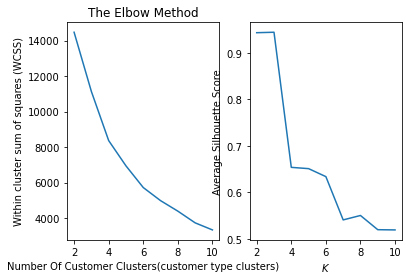

In [78]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(X)
    score.append(silhouette_score(X, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

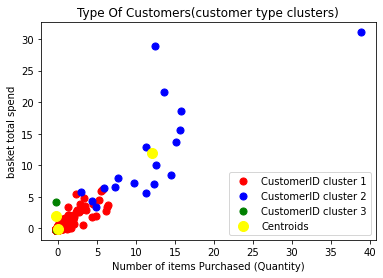

In [79]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'CustomerID cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('basket total spend')
plt.legend()
plt.show()

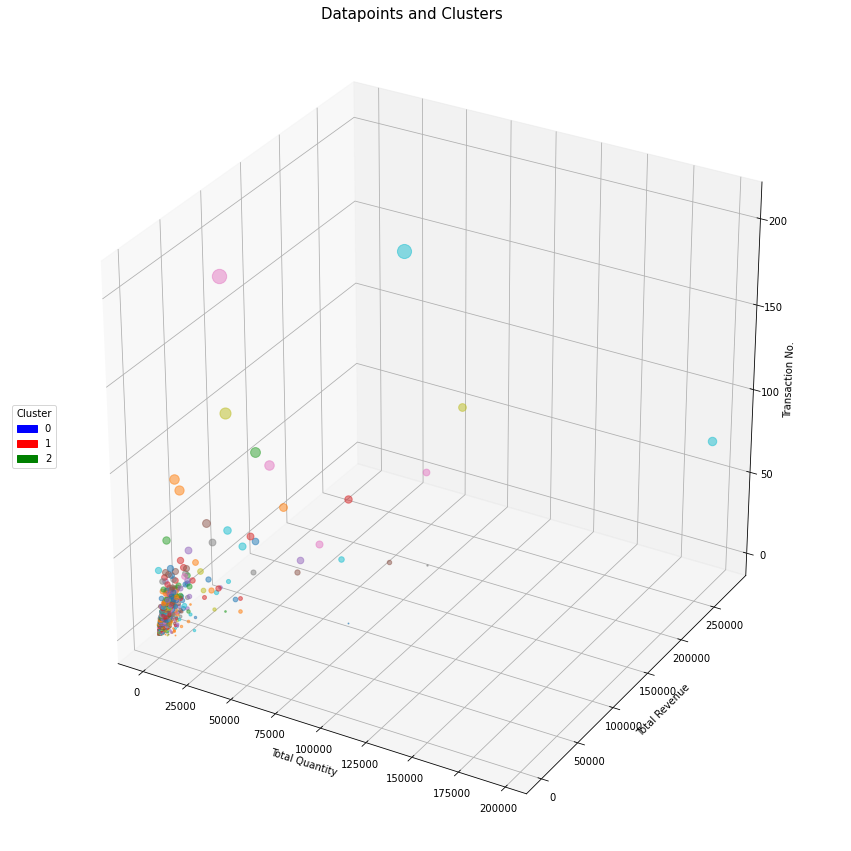

In [84]:
#plotting all datapoints with respect to their cluster
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
#datapoints
xd = list(df_customer_cluster['Quantity'])
yd = list(df_customer_cluster['Revenue'])
zd = list(df_customer_cluster['TransactionNo'])
data_points = [(x,y,z) for x,y,z in zip(xd,yd,zd)]
#specifying point sizes for the number of repeats
sizes = list(df_customer_cluster['TransactionNo'])
#colors for clusters
colorlist = ['blue','red','green']
cv  
#creating the scatterplot
for data, size in zip(data_points, sizes):
    x,y,z = data
    ax.scatter(x,y,z, alpha=0.5, s=size)
ax.set(xlabel='Total Quantity', ylabel='Total Revenue', zlabel='Transaction No.')
#plot legend for cluster colors
legend_items = {'0':'blue', '1':'red', '2':'green'}
itemlist = []
for itemkey in legend_items:
    patch = mpatches.Patch(color=legend_items[itemkey], label=itemkey)
    itemlist.append(patch)
plt.legend(handles=itemlist, title='Cluster', fancybox=True, loc=6)
plt.suptitle('Datapoints and Clusters', fontsize = 15, y = 0.90)
plt.show()

In [37]:
# Let's split the data set into UK and non-UK customers:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


In [38]:
# Let's split the data set into UK and non-UK customers:
df_nuk = df[df['Country'] != 'United Kingdom']
df_nuk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Month_year,Hour,Revenue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,12,2010,Wednesday,2010-12-01,8,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,12,2010,Wednesday,2010-12-01,8,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,12,2010,Wednesday,2010-12-01,8,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,12,2010,Wednesday,2010-12-01,8,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,12,2010,Wednesday,2010-12-01,8,15.6


In [55]:
# working on uk data
df_uk = df_uk.groupby('CustomerID')

df_uk_customer = pd.DataFrame(columns=['CustomerID', 'Quantity', 'UnitPrice', 'Revenue'])

count = 0
for k,v in (df_uk):
    df_uk_customer.loc[count] = [k, v['Quantity'].sum(), v['UnitPrice'].sum(), v['Revenue'].sum()]
    count+=1

df_uk_customer.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [40]:
X = df_uk_customer.iloc[:, [1,3]].values

In [41]:
# feature scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_clusters = range(2, 11), silhouette score is [0.9728220552399852, 0.9589538634159963, 0.8834229933514767, 0.7985588708267679, 0.707358928271174, 0.6988877589986178, 0.7064337440981422, 0.6450254229301019, 0.6404897778064206])


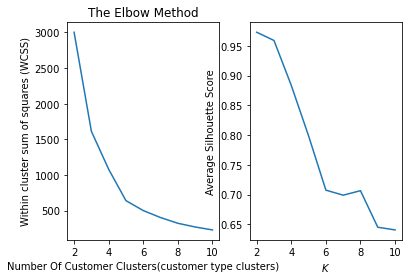

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(X)
    score.append(silhouette_score(X, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

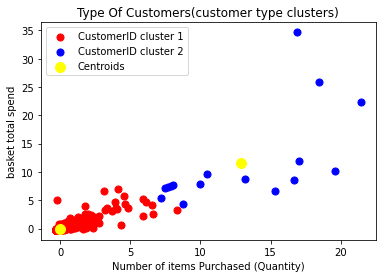

In [43]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'CustomerID cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('basket total spend')
plt.legend()
plt.show()

In [44]:
# working on non-uk data
df_nuk = df.groupby('CustomerID')

df_nuk_customer = pd.DataFrame(columns=['CustomerID', 'Quantity', 'UnitPrice', 'Revenue'])

count = 0
for k,v in (df_nuk):
    df_nuk_customer.loc[count] = [k, v['Quantity'].sum(), v['UnitPrice'].sum(), v['Revenue'].sum()]
    count+=1

df_nuk_customer.head()

,CustomerID,Quantity,UnitPrice,Revenue
0,12346,74215,1.04,77183.60
1,12347,2458,481.21,4310.00
2,12348,2332,18.71,1437.24
3,12349,630,305.10,1457.55
4,12350,196,25.30,294.40


In [45]:
X = df_nuk_customer.iloc[:, [1,3]].values

In [46]:
# feature scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_clusters = range(2, 11), silhouette score is [0.9802521065243691, 0.9579633507340135, 0.9515765698821443, 0.8026889325737823, 0.7961717125270963, 0.7989041413379723, 0.7086160126831857, 0.6994363631346282, 0.7018670385114394])


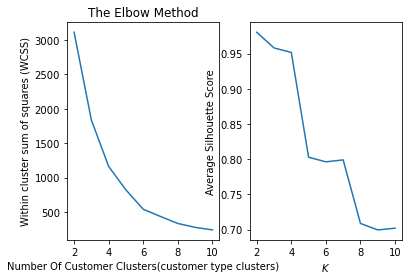

In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2,11)
wcss = []
score = []

for i in ks: #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, random_state=10)
    # init ='k-means++',max_iter=300,n_init=10
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    preds = kmeans.predict(X)
    score.append(silhouette_score(X, preds))
plt.subplot(1, 2, 1)
plt.plot(ks , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')

print("for n_clusters = {}, silhouette score is {})".format(ks, score))
plt.subplot(1, 2, 2)
plt.plot(ks, score)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

plt.show()

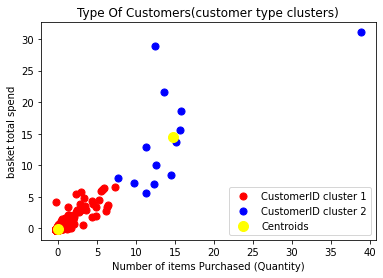

In [48]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'CustomerID cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'CustomerID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('basket total spend')
plt.legend()
plt.show()